In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv('BDI Monthly Price.csv',index_col='Date',parse_dates=True)
df.head()

,Price
Date,
2000-10-01,1759
2000-11-01,1672
2000-12-01,1599
2000-06-01,1616
2000-07-01,1642


In [46]:
len(df)

240

In [47]:
df = df['Price'].resample('MS').mean()

In [48]:
train_data = df.iloc[:228]
test_data = df.iloc[-12:]

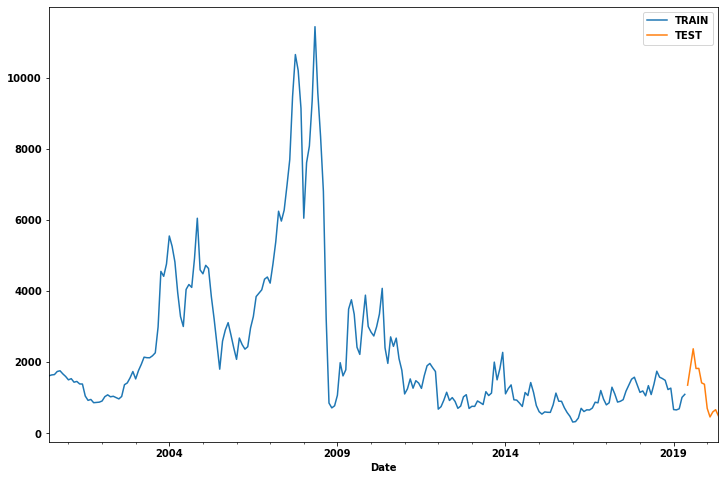

In [49]:
train_data.plot(legend=True,label='TRAIN')
test_data.plot(legend=True,label='TEST',figsize=(12,8));

In [50]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
triple_model = ExponentialSmoothing(train_data,trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = triple_model.forecast(12).rename('TES Forecast')

C:\Users\jwoh1\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 592.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


Text(0.5, 1.0, 'Actual vs Prediction')

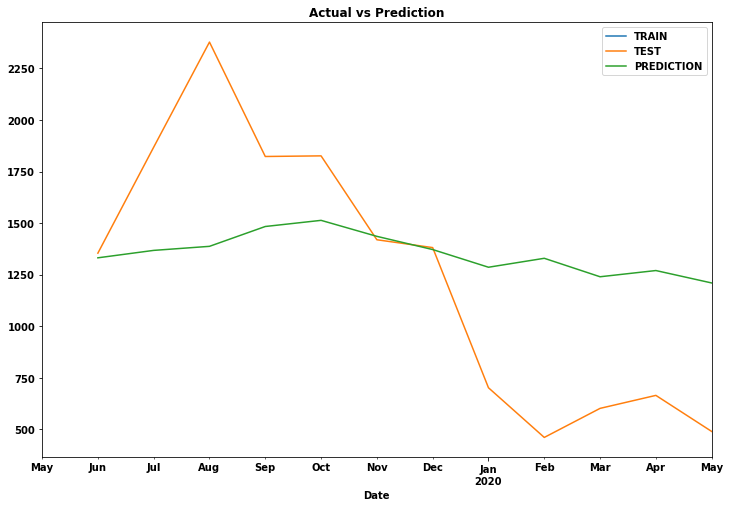

In [59]:
train_data['2019-4-2':].plot(legend=True,label='TRAIN')
test_data.plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Actual vs Prediction')

In [20]:
from sklearn.metrics import mean_squared_error
rms_error = np.sqrt(mean_squared_error(test_data,test_predictions))
print("RMSE Error for TES is ",rms_error)

RMS Error for TES is  565.4812036531591


### Moving Average Model

Test MSE: 1927327.283


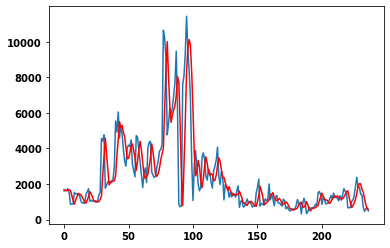

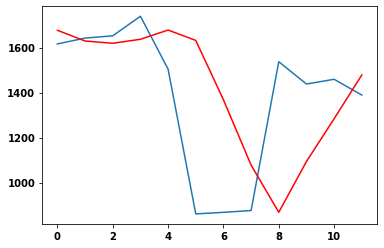

In [62]:
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = read_csv('BDI Monthly Price.csv', header=0, index_col=0)
# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:12])
pyplot.plot(predictions[0:12], color='red')
pyplot.show()

In [64]:
print("RMSE",np.sqrt(error))

RMSE 1388.282133681919
